In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb


In [3]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline


In [4]:
import shap

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
df = pd.read_csv("C:\projects\p1\data\creditcard.csv")

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

<Axes: xlabel='Amount', ylabel='Count'>

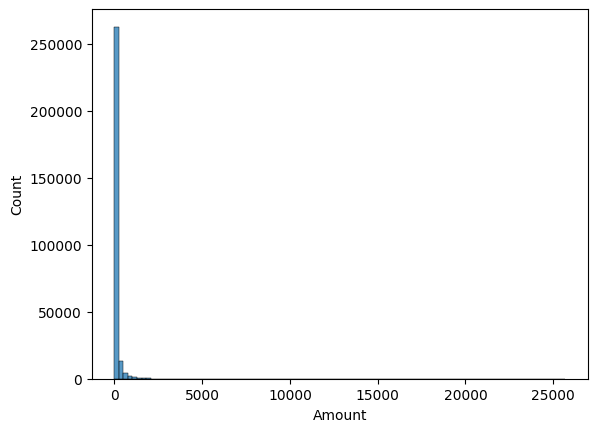

In [11]:
sns.histplot(df['Amount'], bins = 100)

<Axes: xlabel='Class', ylabel='Amount'>

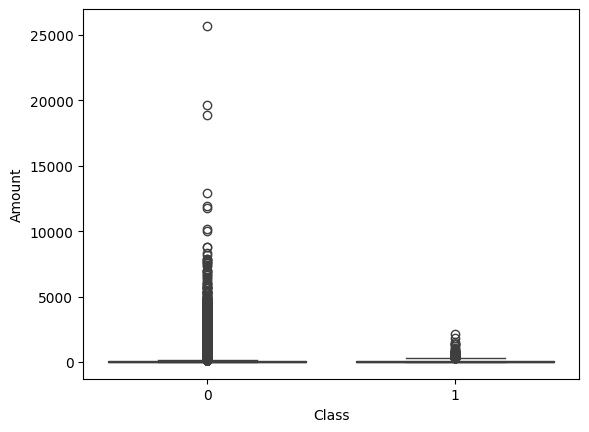

In [12]:
sns.boxplot(x = 'Class', y = 'Amount', data = df)

<Axes: >

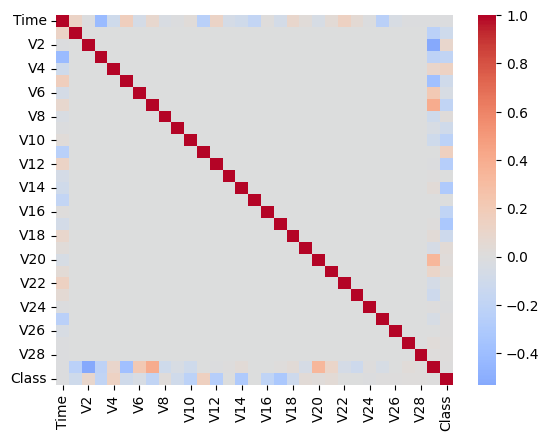

In [13]:
sns.heatmap(df.corr(), cmap = 'coolwarm', center=0)

<Axes: >

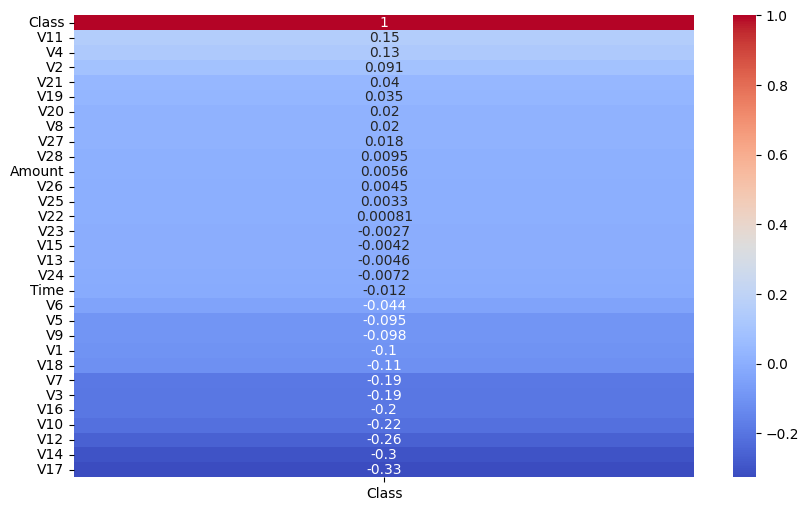

In [14]:
corr_matrix = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix[['Class']].sort_values(by='Class', ascending=False), annot=True, cmap='coolwarm')


<Axes: xlabel='Class', ylabel='Amount'>

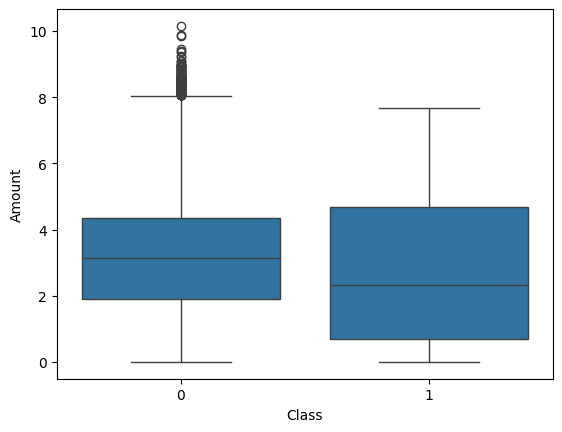

In [15]:
sns.boxplot(x='Class', y=np.log1p(df['Amount']), data=df)


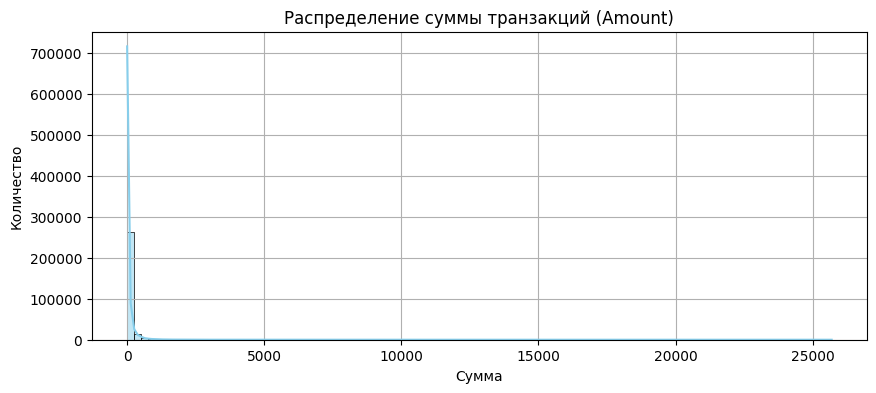

In [16]:
plt.figure(figsize=(10, 4))
sns.histplot(df['Amount'], bins=100, kde=True, color='skyblue')
plt.title('Распределение суммы транзакций (Amount)')
plt.xlabel('Сумма')
plt.ylabel('Количество')
plt.grid(True)
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_14848\1134913718.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Amount', data=df, palette='Set2')


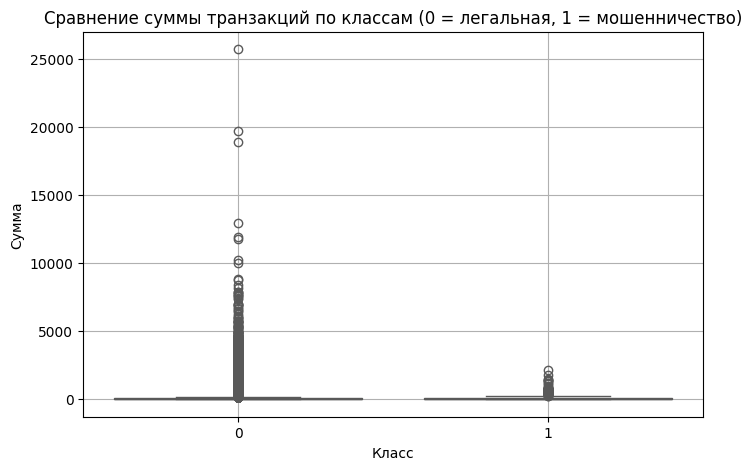

In [17]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Class', y='Amount', data=df, palette='Set2')
plt.title('Сравнение суммы транзакций по классам (0 = легальная, 1 = мошенничество)')
plt.xlabel('Класс')
plt.ylabel('Сумма')
plt.grid(True)
plt.show()


In [18]:
df_processed = df.copy()


In [19]:
#масштаьирование time and amount
scaler = StandardScaler()
df_processed['Amount_Scaled'] = scaler.fit_transform(df[['Amount']])
df_processed['Time_Scaled'] = scaler.fit_transform(df[['Time']])

df_processed.drop(['Amount', 'Time'], axis=1, inplace=True)

In [20]:
df_processed.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Amount_Scaled,Time_Scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


In [21]:
X = df_processed.drop('Class', axis=1)
y = df_processed['Class']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    stratify=y, 
                                                    random_state=42)

In [23]:
print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)
print("Распределение классов в train:", y_train.value_counts(normalize=True))
print("Распределение классов в test:", y_test.value_counts(normalize=True))

Размер обучающей выборки: (199364, 30)
Размер тестовой выборки: (85443, 30)
Распределение классов в train: Class
0    0.998275
1    0.001725
Name: proportion, dtype: float64
Распределение классов в test: Class
0    0.998268
1    0.001732
Name: proportion, dtype: float64


In [24]:
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Не удается найти указанный файл
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\

In [25]:
print("Баланс классов после SMOTE:\n", y_train_balanced.value_counts())

Баланс классов после SMOTE:
 Class
0    199020
1    199020
Name: count, dtype: int64


In [26]:
model = LogisticRegression(max_iter=1000,
                           random_state=42)


In [27]:
model.fit(X_train_balanced, y_train_balanced)

LogisticRegression(max_iter=1000, random_state=42)

In [28]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

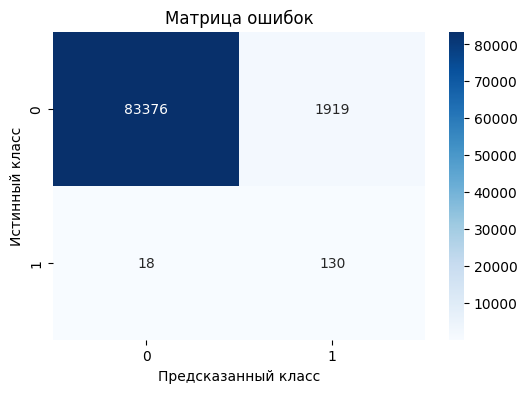

In [29]:
conf_matr = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matr, annot=True, fmt='d', cmap='Blues')
plt.title('Матрица ошибок')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.show()


In [30]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred, digits=4))

Classification Report:

              precision    recall  f1-score   support

           0     0.9998    0.9775    0.9885     85295
           1     0.0634    0.8784    0.1183       148

    accuracy                         0.9773     85443
   macro avg     0.5316    0.9279    0.5534     85443
weighted avg     0.9982    0.9773    0.9870     85443



In [31]:
auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC: {auc:.4f}")

ROC AUC: 0.9660


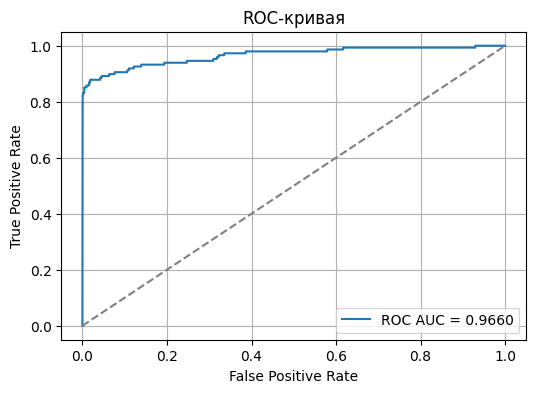

In [32]:
# ROC-кривая
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC AUC = {auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend()
plt.grid(True)
plt.show()


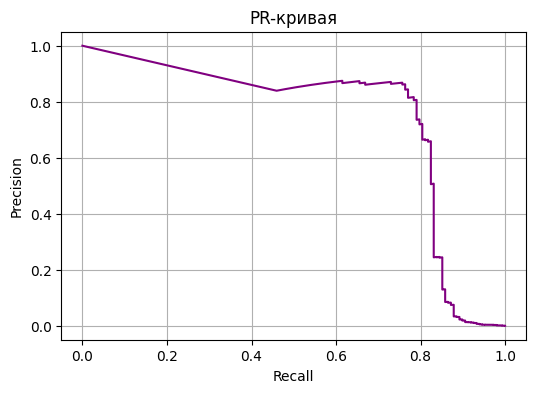

In [33]:
# Precision-Recall кривая
precision, recall, _ = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='purple')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR-кривая')
plt.grid(True)
plt.show()


In [34]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(random_state=42)

In [35]:
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

In [36]:
print("--->Random Forest<---")
print("ROC AUC:", roc_auc_score(y_test, y_proba_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, digits=4))

--->Random Forest<---
ROC AUC: 0.9488861788102659

Classification Report:
              precision    recall  f1-score   support

           0     0.9996    0.9998    0.9997     85295
           1     0.8582    0.7770    0.8156       148

    accuracy                         0.9994     85443
   macro avg     0.9289    0.8884    0.9076     85443
weighted avg     0.9994    0.9994    0.9994     85443



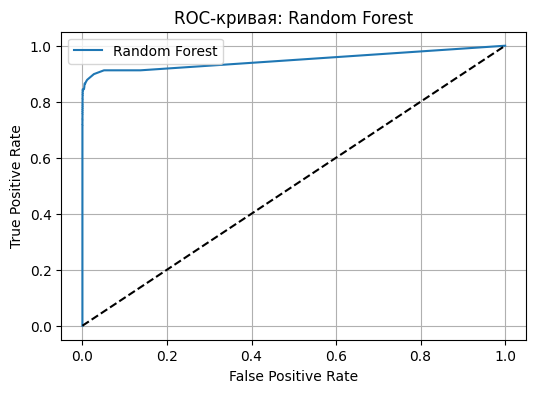

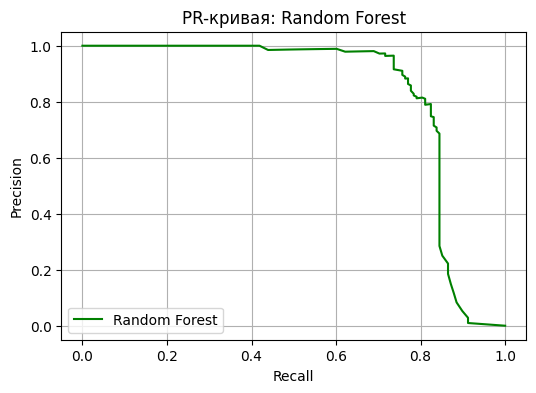

In [37]:
# ROC-AUC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC-кривая: Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()

# PR
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_proba_rf)
plt.figure(figsize=(6, 4))
plt.plot(recall_rf, precision_rf, label='Random Forest', color='green')
plt.title('PR-кривая: Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()
plt.legend()
plt.show()

In [38]:
xgb_model = xgb.XGBClassifier(n_estimators=100,
                            learning_rate=0.2,
                            max_depth=5,
                            random_state=42,
                            use_label_encoder=False,
                            eval_metric='logloss')

In [39]:
xgb_model.fit(X_train_balanced, y_train_balanced)

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [23:09:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [40]:
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

In [41]:
print("--->XGBoost<---")
print("ROC AUC:", roc_auc_score(y_test, y_proba_xgb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb, digits=4))


--->XGBoost<---
ROC AUC: 0.9749119906588105

Classification Report:
              precision    recall  f1-score   support

           0     0.9997    0.9984    0.9991     85295
           1     0.4764    0.8176    0.6020       148

    accuracy                         0.9981     85443
   macro avg     0.7380    0.9080    0.8005     85443
weighted avg     0.9988    0.9981    0.9984     85443



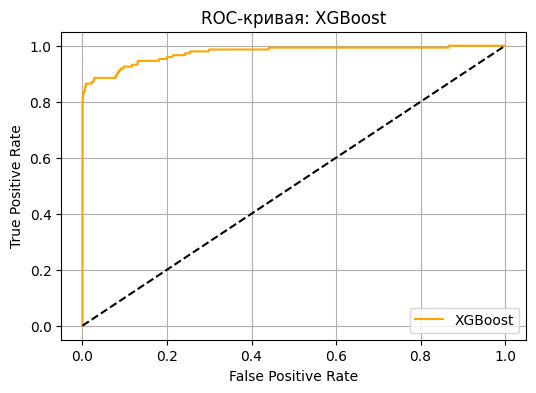

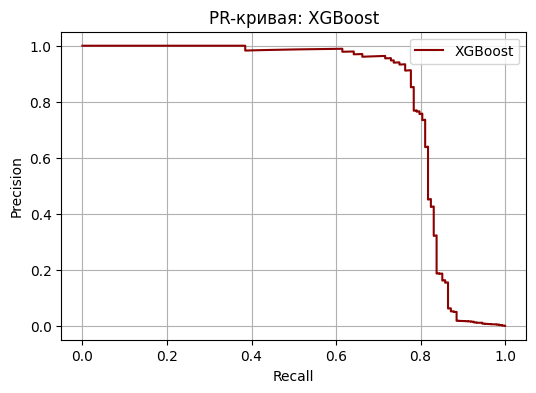

In [42]:
# ROC-AUC
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
plt.figure(figsize=(6, 4))
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost', color='orange')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC-кривая: XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()

# PR
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_proba_xgb)
plt.figure(figsize=(6, 4))
plt.plot(recall_xgb, precision_xgb, label='XGBoost', color='darkred')
plt.title('PR-кривая: XGBoost')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()
plt.legend()
plt.show()


In [43]:
lgb_model = lgb.LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
    )

In [44]:
lgb_model.fit(X_train_balanced, y_train_balanced)


[LightGBM] [Info] Number of positive: 199020, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012390 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 398040, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

LGBMClassifier(max_depth=5, random_state=42)

In [45]:
y_pred_lgb = lgb_model.predict(X_test)
y_proba_lgb = lgb_model.predict_proba(X_test)[:, 1]

In [46]:
print("=== LightGBM ===")
print("ROC AUC:", roc_auc_score(y_test, y_proba_lgb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lgb, digits=4))


=== LightGBM ===
ROC AUC: 0.9682096951280375

Classification Report:
              precision    recall  f1-score   support

           0     0.9997    0.9957    0.9977     85295
           1     0.2495    0.8176    0.3823       148

    accuracy                         0.9954     85443
   macro avg     0.6246    0.9067    0.6900     85443
weighted avg     0.9984    0.9954    0.9966     85443



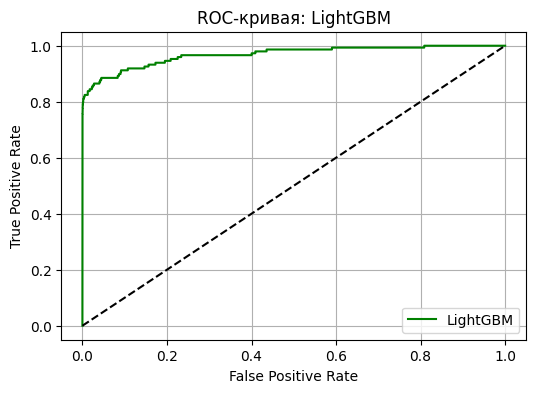

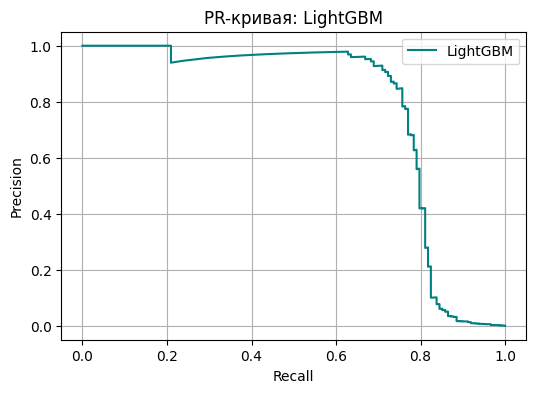

In [47]:
# ROC-AUC
fpr_lgb, tpr_lgb, _ = roc_curve(y_test, y_proba_lgb)
plt.figure(figsize=(6, 4))
plt.plot(fpr_lgb, tpr_lgb, label='LightGBM', color='green')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC-кривая: LightGBM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()

# PR
precision_lgb, recall_lgb, _ = precision_recall_curve(y_test, y_proba_lgb)
plt.figure(figsize=(6, 4))
plt.plot(recall_lgb, precision_lgb, label='LightGBM', color='teal')
plt.title('PR-кривая: LightGBM')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()
plt.legend()
plt.show()


Сравнение моделей:

In [48]:
from sklearn.metrics import precision_score, recall_score, f1_score

def get_metrics(y_true, y_pred, y_proba):
    return {
        'ROC AUC': roc_auc_score(y_true, y_proba),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1': f1_score(y_true, y_pred)
    }

results = {
    'Logistic Regression': get_metrics(y_test, y_pred, y_proba),
    'Random Forest': get_metrics(y_test, y_pred_rf, y_proba_rf),
    'XGBoost': get_metrics(y_test, y_pred_xgb, y_proba_xgb),
    'LightGBM': get_metrics(y_test, y_pred_lgb, y_proba_lgb),
}

comparison_df = pd.DataFrame(results).T.round(4)
display(comparison_df)


,ROC AUC,Precision,Recall,F1
Logistic Regression,0.9660,0.0634,0.8784,0.1183
Random Forest,0.9489,0.8582,0.7770,0.8156
XGBoost,0.9749,0.4764,0.8176,0.6020
LightGBM,0.9682,0.2495,0.8176,0.3823


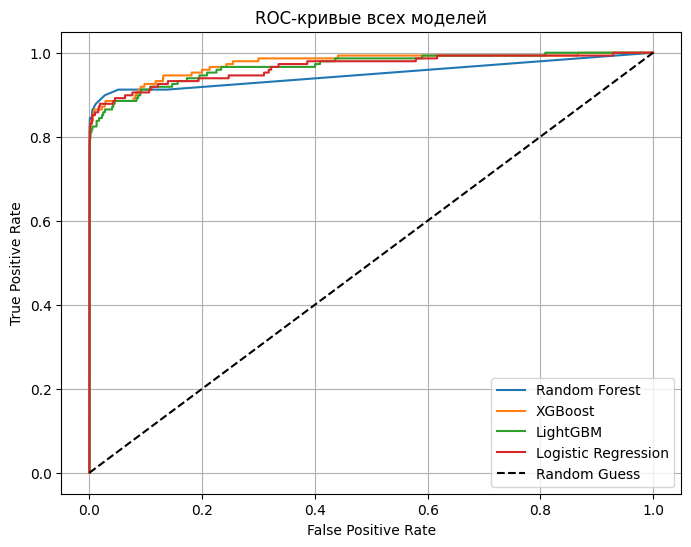

In [49]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')
plt.plot(fpr_lgb, tpr_lgb, label='LightGBM')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые всех моделей')
plt.legend()
plt.grid(True)
plt.show()

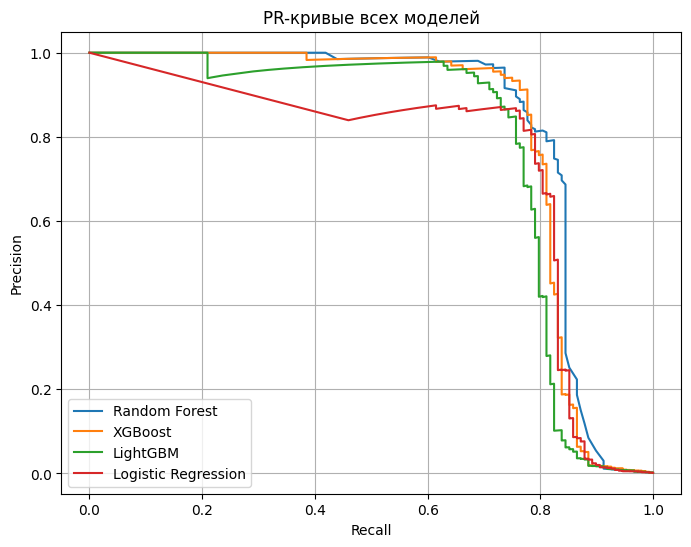

In [50]:
plt.figure(figsize=(8, 6))
plt.plot(recall_rf, precision_rf, label='Random Forest')
plt.plot(recall_xgb, precision_xgb, label='XGBoost')
plt.plot(recall_lgb, precision_lgb, label='LightGBM')
plt.plot(recall, precision, label='Logistic Regression')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR-кривые всех моделей')
plt.legend()
plt.grid(True)
plt.show()
